In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [27]:
df=pd.read_csv('product b.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [28]:
sales_b= df.drop(['Product Name','Product Category','Month','Year','Market Size','Month No.', 'Marketing Expense'],axis=1)

In [29]:
sales_b.shape

(60, 1)

In [30]:
sales_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [31]:
sales_b['Sales'].sum()

70016882

Text(0.5, 1.0, 'Product B')

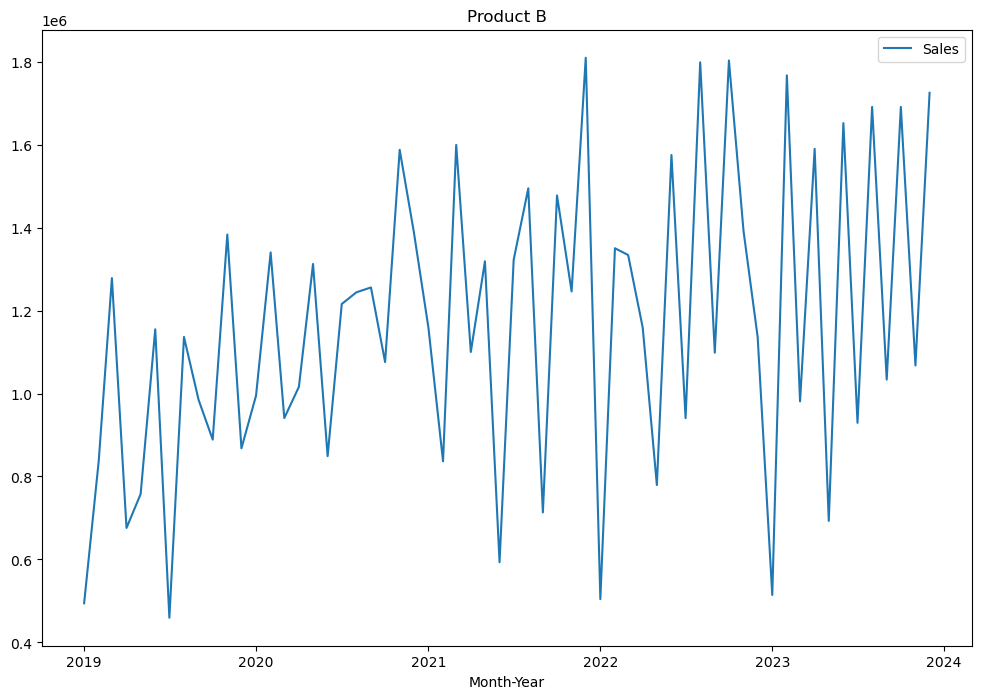

In [32]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_b)
plt.title('Product B')

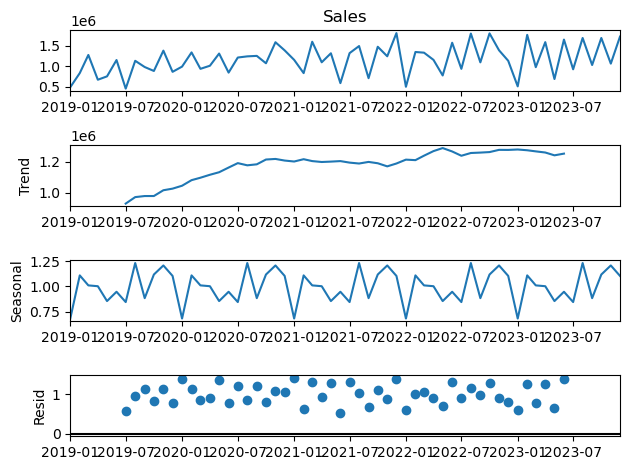

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_b['Sales'], model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.show()

In [34]:
train= sales_b[:48]
test=sales_b[48:]

In [35]:
len(train)

48

In [36]:
model=ExponentialSmoothing(train['Sales'],trend='add', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [37]:
pred=model.forecast(12)

In [38]:
pred

2023-01-01    1.038792e+06
2023-02-01    1.359765e+06
2023-03-01    1.462546e+06
2023-04-01    1.233030e+06
2023-05-01    1.291109e+06
2023-06-01    1.116338e+06
2023-07-01    1.190154e+06
2023-08-01    1.586225e+06
2023-09-01    1.215957e+06
2023-10-01    1.390633e+06
2023-11-01    1.713713e+06
2023-12-01    1.621716e+06
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product B')

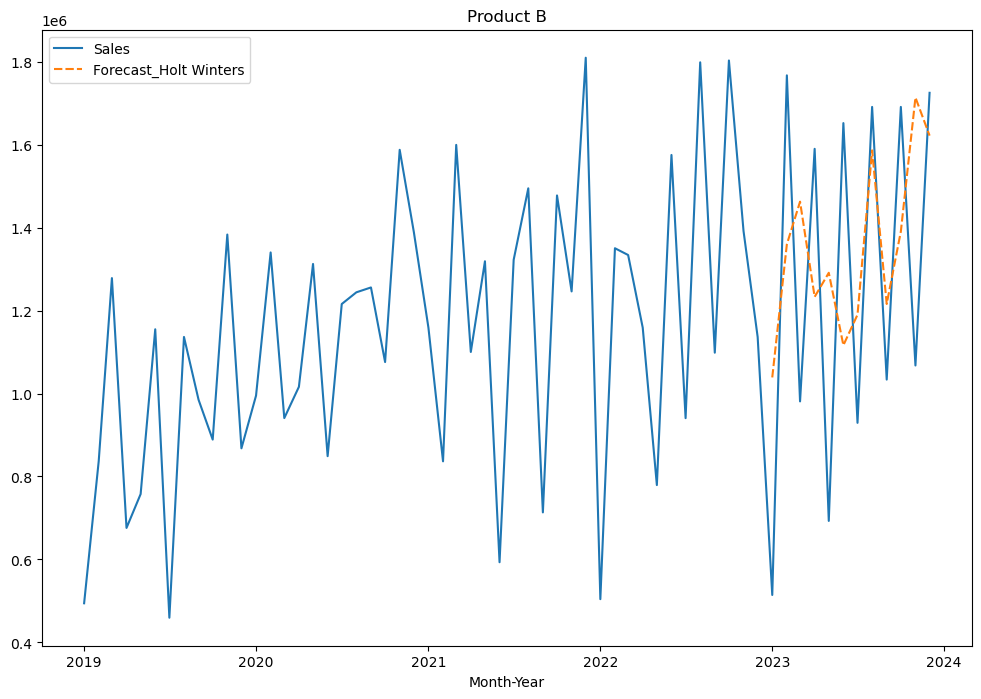

In [39]:
sales_b['Forecast_Holt Winters']=[None]*len(train) + list(pred)
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_Holt Winters']])
plt.title('Product B')

In [40]:
mae= mean_absolute_error(test['Sales'],pred)
mse=mean_squared_error(test['Sales'], pred)
mape= mean_absolute_percentage_error(test['Sales'],pred)
rmse= np.sqrt(mean_squared_error(test['Sales'], pred))

print(f'MAE - Holt Winters: {mae}')
print(f'MAPE - Holt Winters: {mape}')
print(f'MSE - Holt Winters: {mse}')
print(f'RMSE - Holt Winters: {rmse}')

MAE - Holt Winters: 375119.6384968798
MAPE - Holt Winters: 0.376208984993627
MSE - Holt Winters: 172947233478.7385
RMSE - Holt Winters: 415869.25046069286


In [41]:
sales_b.tail(12)

,Sales,Forecast_Holt Winters
Month-Year,,
2023-01-01,514369,1.038792e+06
2023-02-01,1767039,1.359765e+06
2023-03-01,981026,1.462546e+06
2023-04-01,1589911,1.233030e+06
2023-05-01,692905,1.291109e+06
2023-06-01,1651940,1.116338e+06
2023-07-01,929333,1.190154e+06
2023-08-01,1690948,1.586225e+06
2023-09-01,1033615,1.215957e+06


# FORECASTING

In [42]:
model_forecast=ExponentialSmoothing(sales_b['Sales'],trend='add', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [43]:
forecast_=model_forecast.forecast(12)

In [44]:
forecast_

2024-01-01    8.837242e+05
2024-02-01    1.432571e+06
2024-03-01    1.306250e+06
2024-04-01    1.296346e+06
2024-05-01    1.107916e+06
2024-06-01    1.227027e+06
2024-07-01    1.096473e+06
2024-08-01    1.594660e+06
2024-09-01    1.147419e+06
2024-10-01    1.449713e+06
2024-11-01    1.566059e+06
2024-12-01    1.433337e+06
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product B')

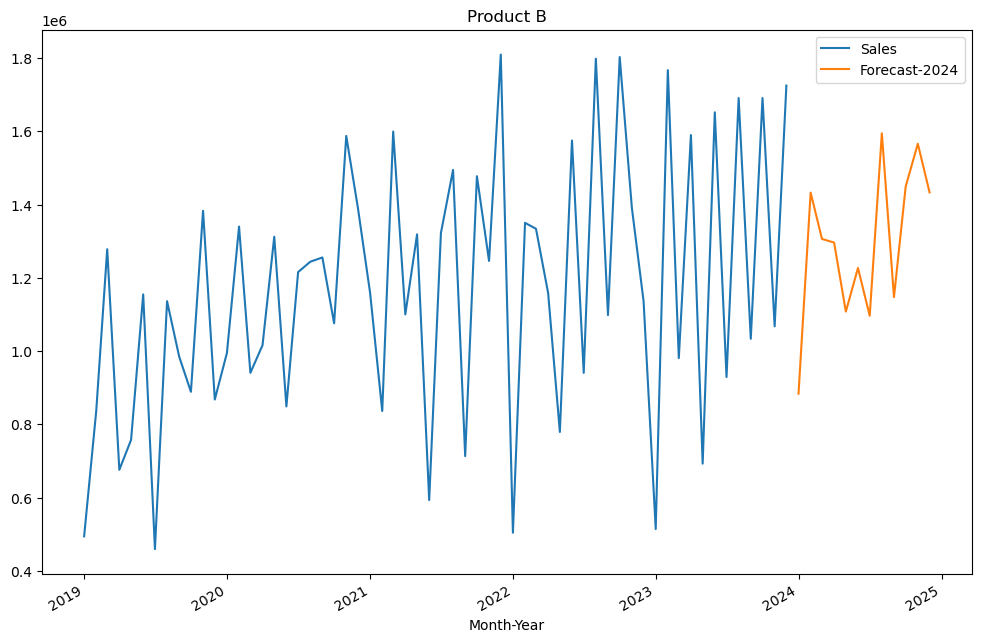

In [45]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales']])
forecast_.plot(legend=True, label='Forecast-2024')
plt.title('Product B')